Loading image from ../img/panda.jpg
Initial load shape: (427, 640, 3), dtype: uint8
Final data shape: (427, 640, 3), dtype: float32


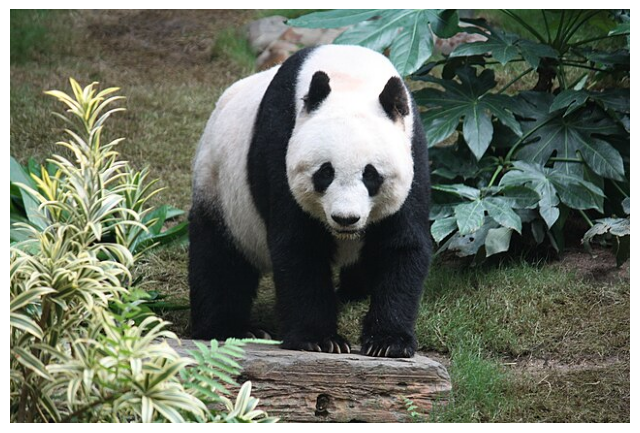

is_color check: shape=(427, 640, 3), result=True
Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32
Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32
Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32
Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32


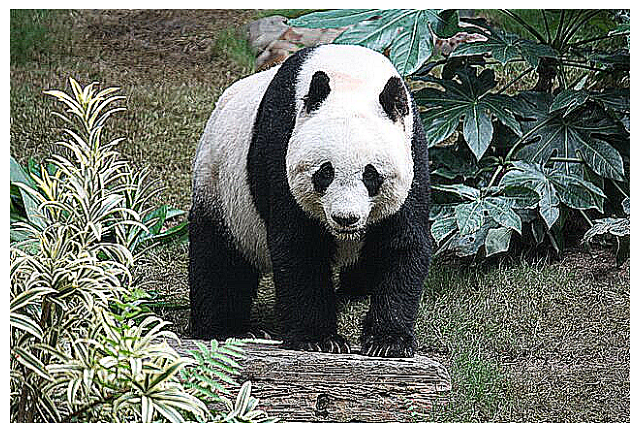

is_color check: shape=(427, 640, 3), result=True
Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32


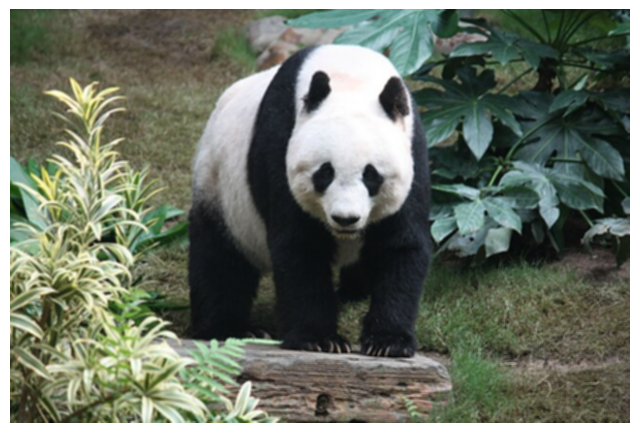

is_color check: shape=(427, 640, 3), result=True
Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32
Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32
Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32


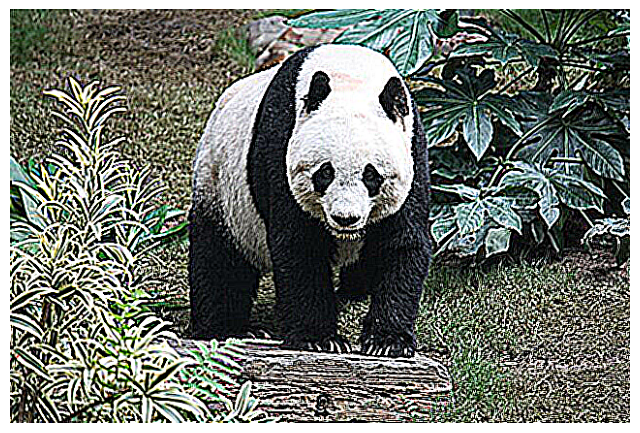

is_color check: shape=(427, 640, 3), result=True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32


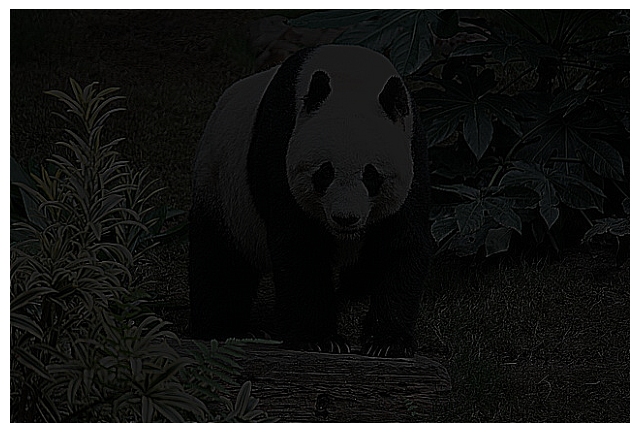

is_color check: shape=(427, 640, 3), result=True
Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32
is_color check: shape=(427, 640, 3), result=True
Array input shape: (427, 640, 3), dtype: float32
Final data shape: (427, 640, 3), dtype: float32


In [2]:
import numpy as np
import importlib
import cv_lib
importlib.reload(cv_lib)
from cv_lib import Image, Convolution, KernelType

# Load an image
image = Image("../img/panda.jpg")
image.show()

# Create convolution instance
conv = Convolution()

# Sharpen the image
sharpened = conv.sharpen(image, amount=10)  # amount > 1 increases sharpening strength
sharpened.show()

blurred = conv.apply_kernel(image, KernelType.BOX_BLUR)
blurred.show()

# Deblur the image
deblurred = conv.deblur(blurred, strength=10)  # adjust strength as needed
deblurred.show()

# Apply custom kernel
custom_kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
]) / 9.0
filtered = conv.convolve2d(image, custom_kernel)
filtered.show()

# Use predefined kernels
edge_detected = conv.apply_kernel(image, KernelType.SOBEL, direction='x')
blurred = conv.apply_kernel(image, KernelType.GAUSSIAN, size=5, sigma=1.5)